# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make data
x_1 = np.linspace(start=-3, stop=3, num=100)

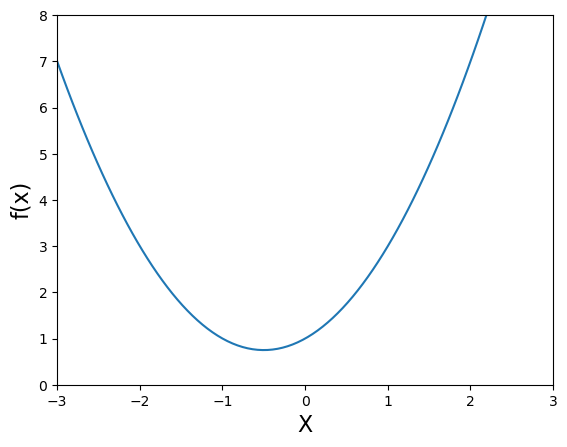

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

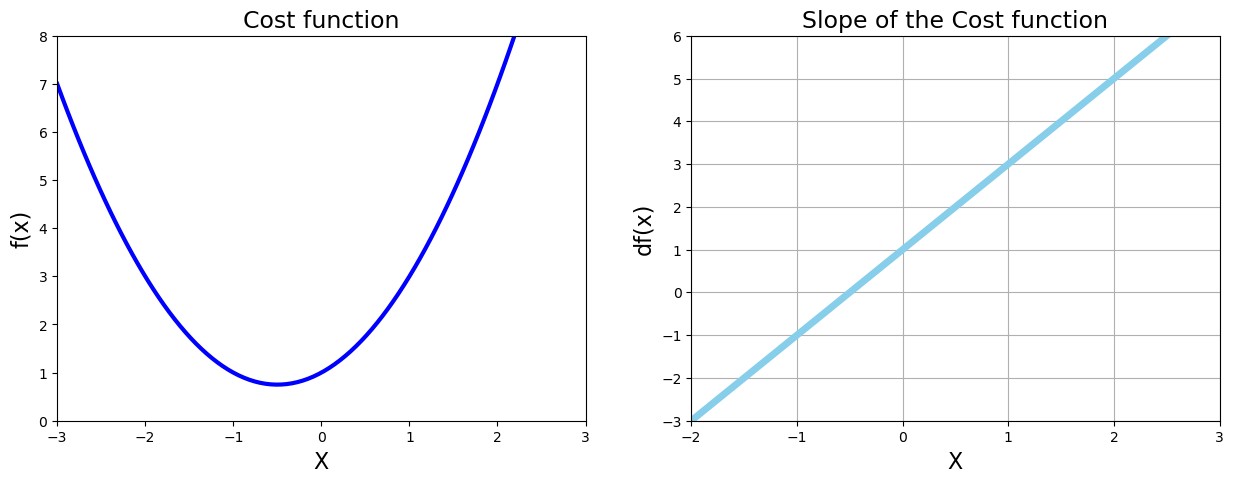

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

plt.plot(x_1, f(x_1), c="blue", linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), c="skyblue", linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print("Loop ran this many times:", n)
        break
    
print("Local minimum occurs at:", new_x)
print("Slope or df(x) value at this point is:", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


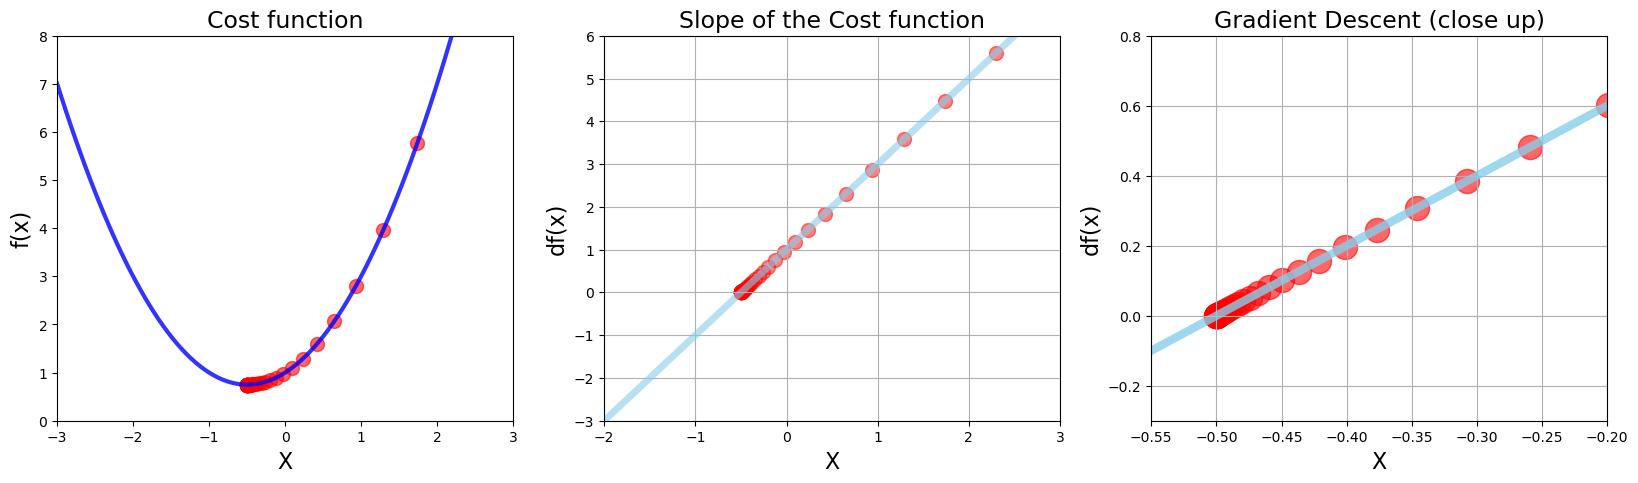

In [8]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# Chart 1: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

plt.plot(x_1, f(x_1), c="blue", linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), c="red", s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 3, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), c="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, c="red", s=100, alpha=0.5)

# Chart 3: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.title("Gradient Descent (close up)", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), c="skyblue", linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, c="red", s=300, alpha=0.6)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

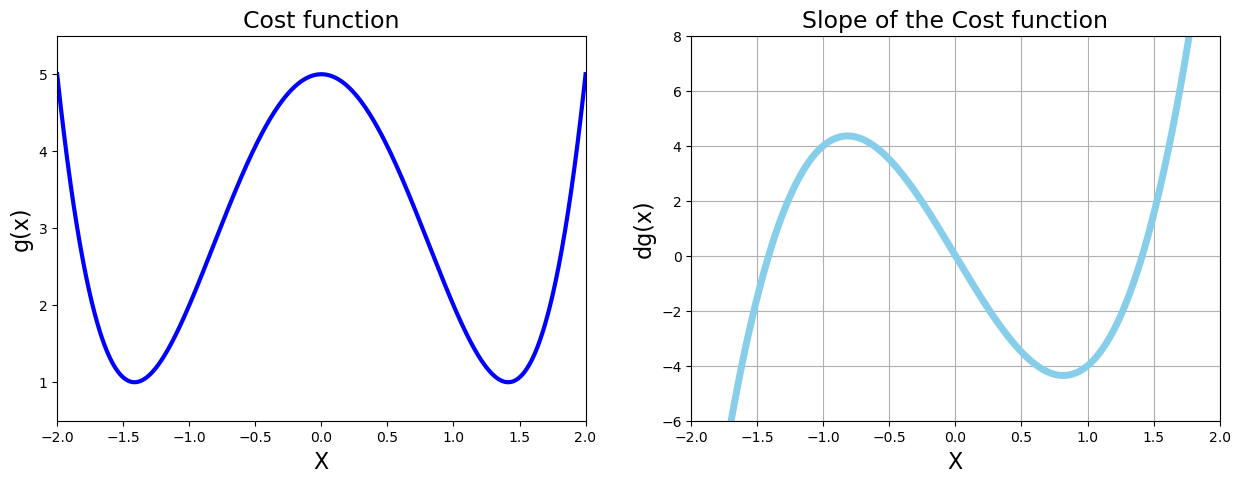

In [10]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2, g(x_2), c="blue", linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), c="skyblue", linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.02, precision=0.001)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, 
                                                 multiplier=0.01, precision=0.0001)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

Local min occurs at: 1.4137636556157256
Number of steps: 56


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


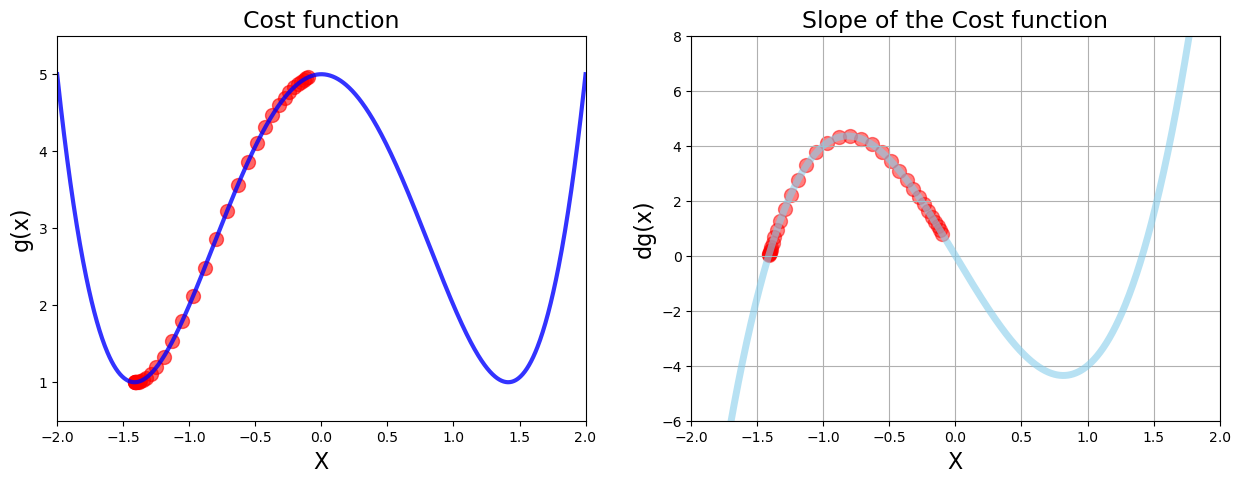

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2, g(x_2), c="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), c="red", s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), c="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, c="red", s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [16]:
# Make Data
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

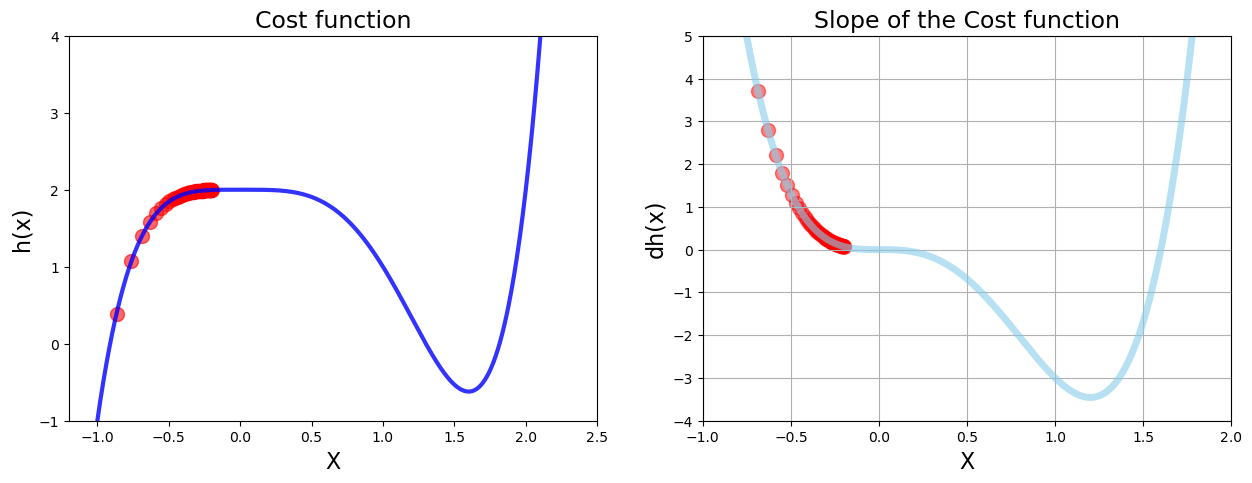

Local min occurs at: -2071072.4470816324
Cost at this minimum is: -3.810455326061589e+31
Number of steps: 71


In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)

plt.plot(x_3, h(x_3), c="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), c="red", s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)

plt.grid()
plt.plot(x_3, dh(x_3), c="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, c="red", s=100, alpha=0.5)

plt.show()

print("Local min occurs at:", local_min)
print("Cost at this minimum is:", h(local_min))
print("Number of steps:", len(list_x))

In [18]:
import sys
# help(sys)
# sys.version
sys.float_info.max

1.7976931348623157e+308

# The Learning Rate

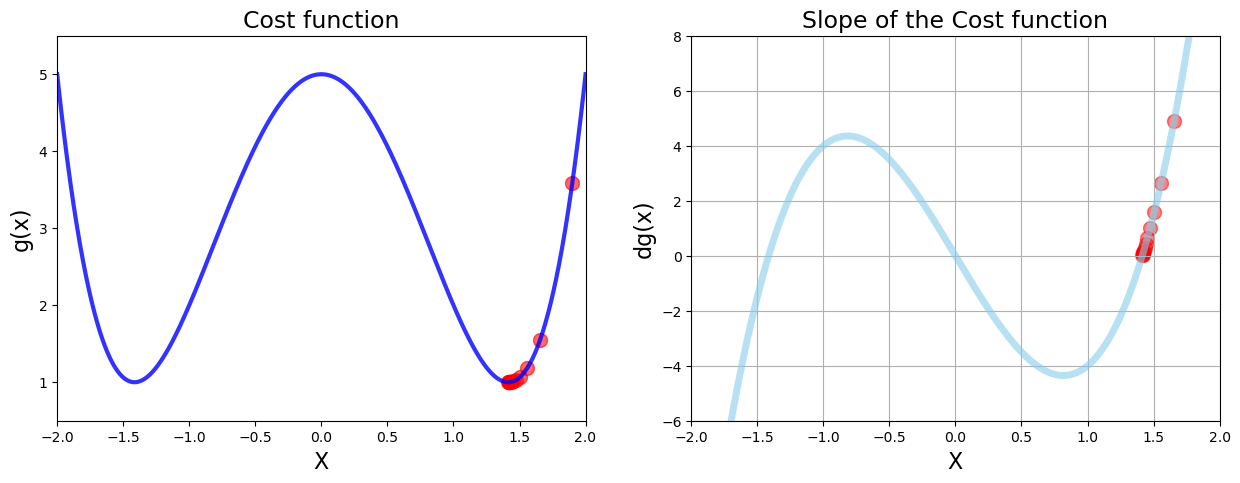

Number of steps is: 14


In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2, g(x_2), c="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), c="red", s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), c="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, c="red", s=100, alpha=0.5)

plt.show()

print("Number of steps is:", len(list_x))

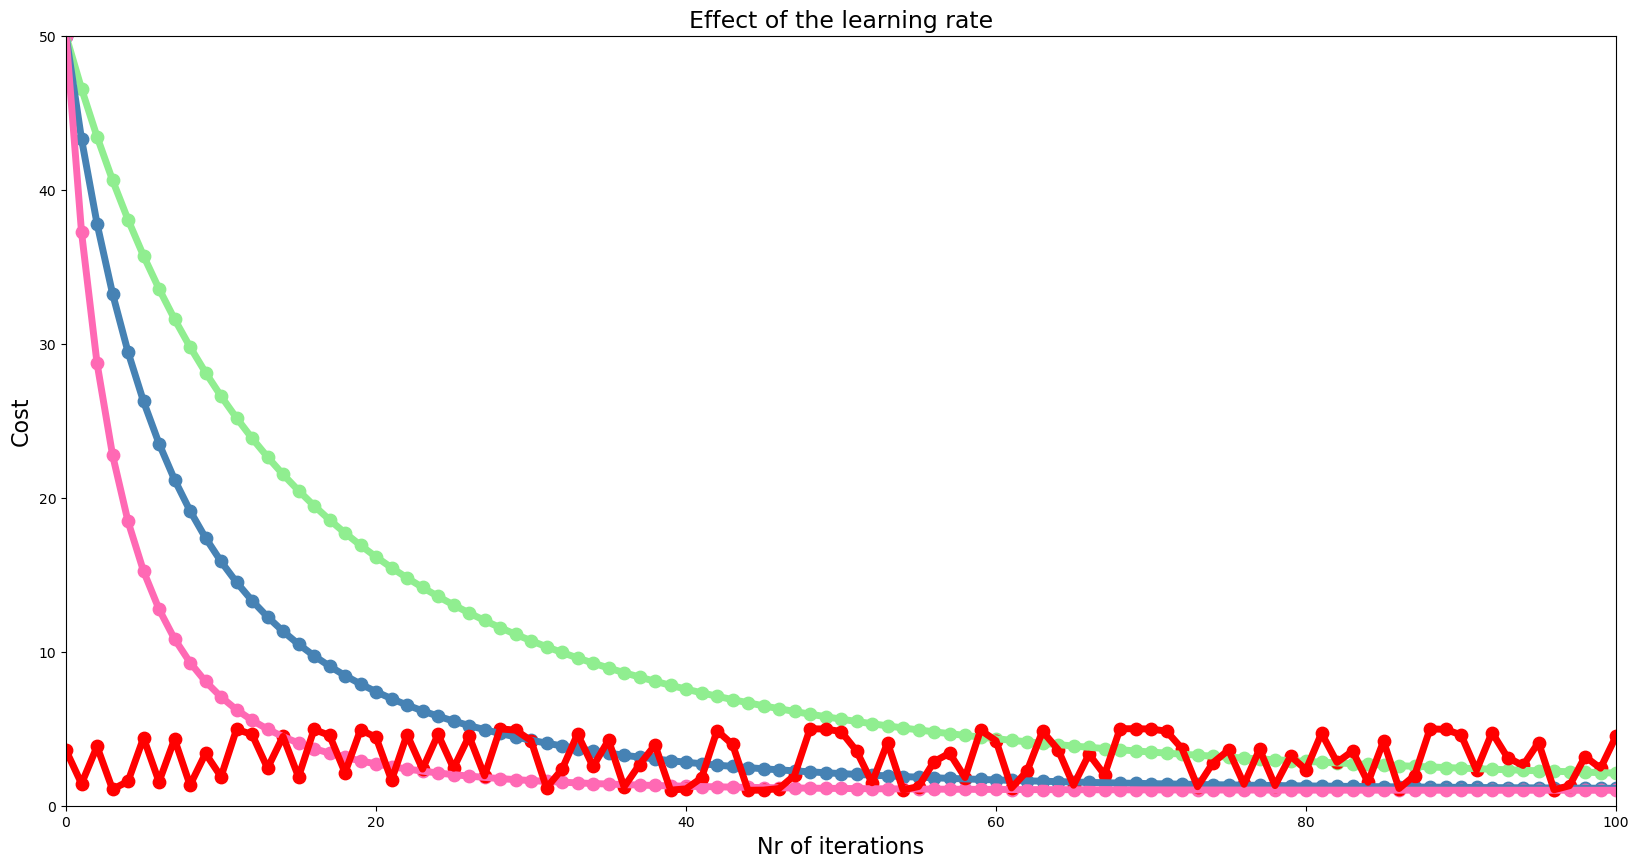

In [20]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, 
                                                 precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, 
                                                 precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, 
                                                 precision=0.0001, max_iter=n)

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, 
                                                 precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title("Effect of the learning rate", fontsize=17)
plt.xlabel("Nr of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# Y Axis data
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# X Axis data
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), c="lightgreen", linewidth=5)
plt.scatter(iteration_list, g(low_values), c="lightgreen", s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), c="steelblue", linewidth=5)
plt.scatter(iteration_list, g(mid_values), c="steelblue", s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), c="hotpink", linewidth=5)
plt.scatter(iteration_list, g(high_values), c="hotpink", s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(insane_values), c="red", linewidth=5)
plt.scatter(iteration_list, g(insane_values), c="red", s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [21]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [22]:
# Make data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print("Shape of X array", x_4.shape)

# Needs to be 2-dim array to plot in 3D
x_4, y_4 = np.meshgrid(x_4, y_4)

print("Shape of X array after meshgrid", x_4.shape)

Shape of X array (200,)
Shape of X array after meshgrid (200, 200)


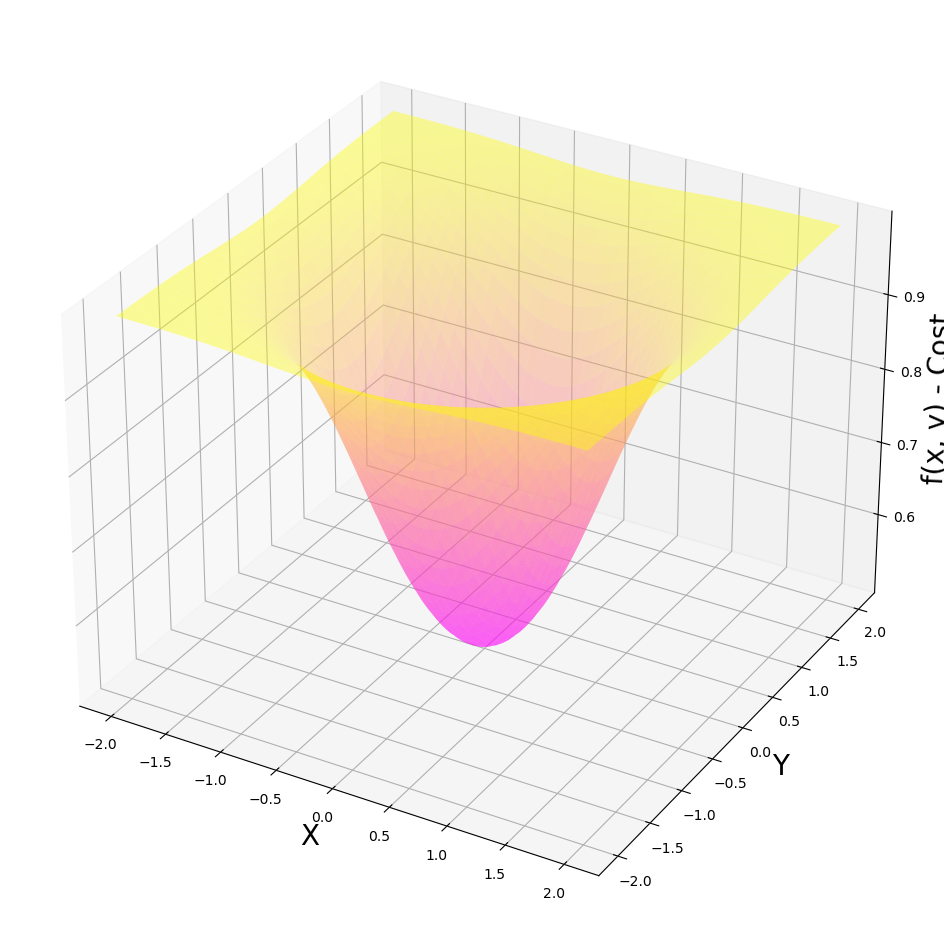

In [23]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x, y) - Cost", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.spring, alpha=0.4)

plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [24]:
a, b = symbols('x, y')
f(a, b)

1/(3**(-x**2 - y**2) + 1)

In [25]:
diff(f(a,b), a) # Partial derivative wrt to x

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [26]:
f(a, b).evalf(subs={a:1.8, b:1.0}) # Evaulate value of function at specific point

0.990604794032582

In [27]:
diff(f(a,b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

## Batch Gradient Descent with SymPy

In [28]:
%%time

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print("Values in gradient array", gradients)
print("Minimum occurs at x value of: ", params[0])
print("Minimum occurs at y value of: ", params[1])
print("Cost is: ", f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
Cost is:  0.500000000000000
CPU times: total: 1.02 s
Wall time: 1.07 s


In [29]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [30]:
%%time

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print("Values in gradient array", gradients)
print("Minimum occurs at x value of: ", params[0])
print("Minimum occurs at y value of: ", params[1])
print("Cost is: ", f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
Cost is:  0.5
CPU times: total: 15.6 ms
Wall time: 3.49 ms


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [31]:
# Setup
multiplier = 0.1
max_iter = 100
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2) #.reshape(nrows, ncols)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0) #Same as above line of code, different functions
    
# Results
print("Values in gradient array", gradients)
print("Minimum occurs at x value of: ", params[0])
print("Minimum occurs at y value of: ", params[1])
print("Cost is: ", f(params[0], params[1]))

Values in gradient array [0.13086082 0.07270045]
Minimum occurs at x value of:  0.22554260634177148
Minimum occurs at y value of:  0.12530144796765078
Cost is:  0.518275488025232


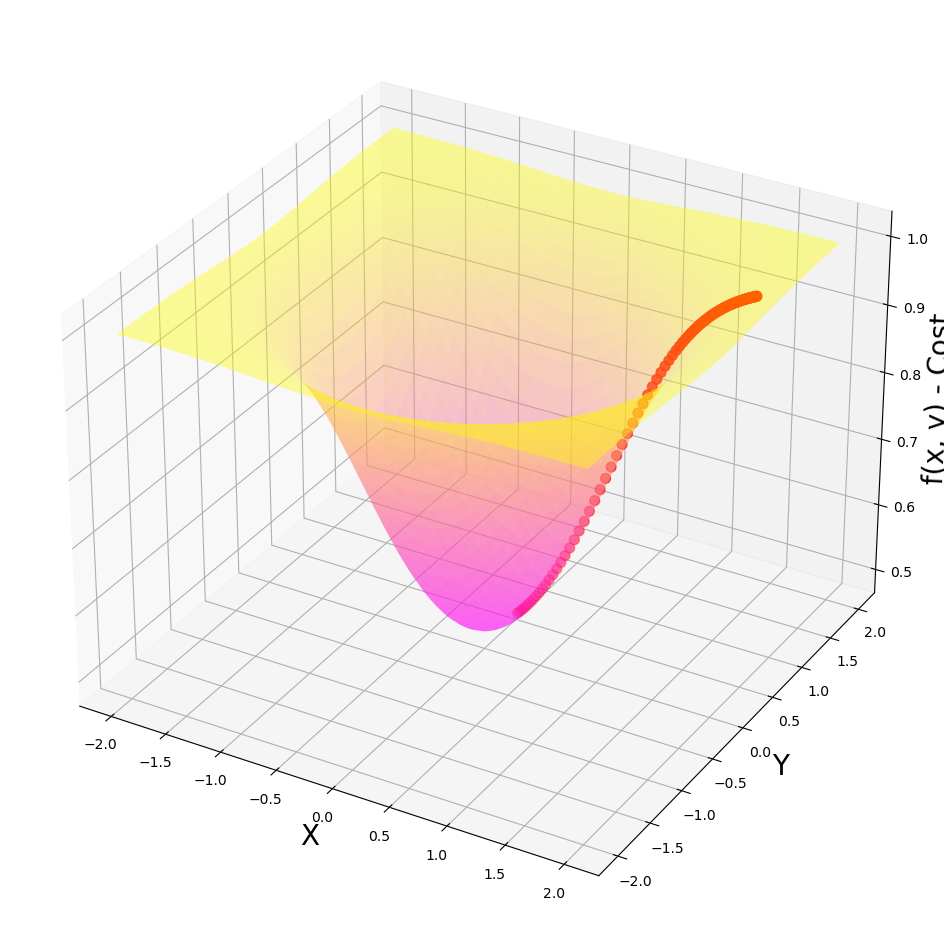

In [32]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x, y) - Cost", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.spring, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [33]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']]) # 1 row, 2 cols
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']]) # 2 rows, 2 cols
print(hs_band.shape)

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print("Printing nicknames...", the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print("Printing band roles...", the_roots[:, 1])

(1, 2)
(2, 2)
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [34]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print("Shape of x_5 array:", x_5.shape)
print("Shape of y_5 array:", y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [35]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print("Theta 0:", regr.intercept_[0])
print("Theta 1:", regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


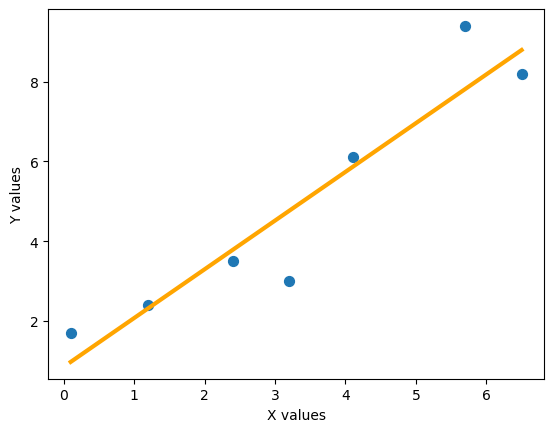

In [36]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), c="orange", linewidth=3)

plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

In [37]:
# y_hat = theta0 + theta1*x
y_hat = regr.intercept_[0] + regr.coef_[0][0]*x_5
print("Est, values y_hat are: \n", y_hat)
print("In comparison, the actual y values are \n", y_5)

Est, values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
def mse(y, y_hat):
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [39]:
print("Manually calculated MSE:", mse(y_5, y_hat))
print("MSE using sklearn and manually calc:", mean_squared_error(y_5, y_hat))
print("MSE using sklearn and regr:", mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE: [0.94796558]
MSE using sklearn and manually calc: 0.9479655759794577
MSE using sklearn and regr: 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [45]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [46]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
#plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

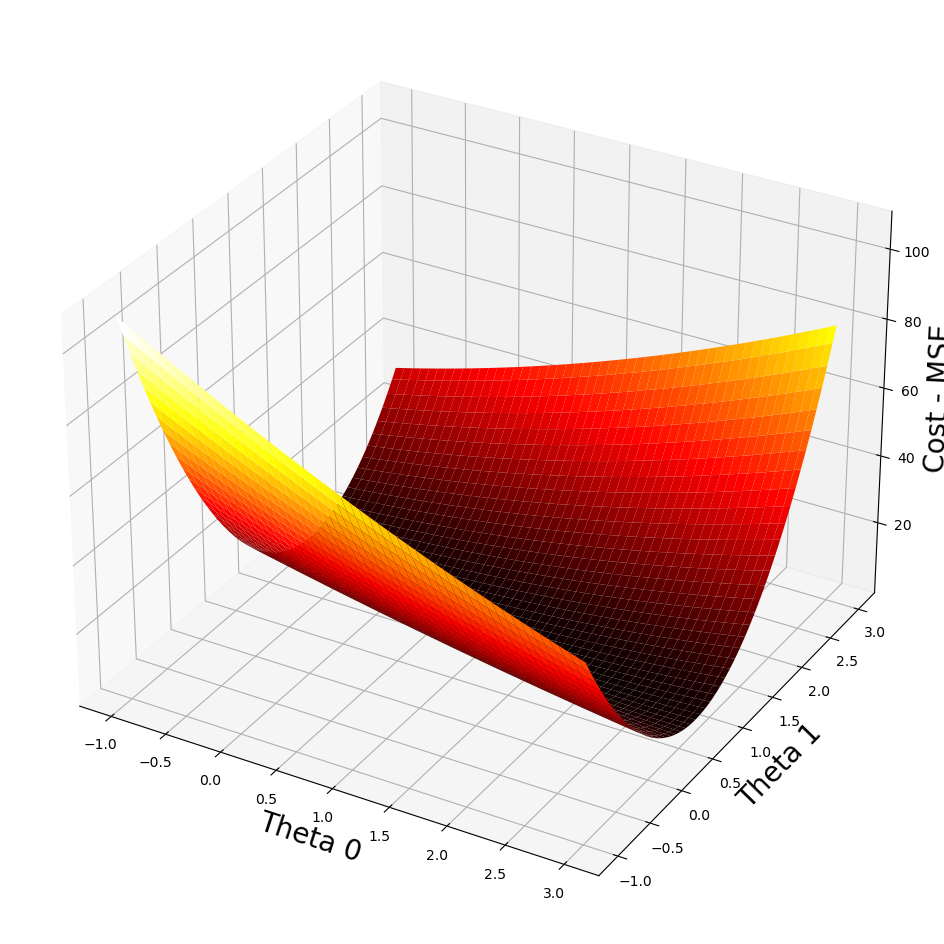

In [48]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

plt.show()

In [55]:
print("Min value of plot_cost", plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print("Min occurst at (i,j):", ij_min)
print("Min MSE for Theta 0 at plot_t0[111][91]", plot_t0[111][91])
print("Min MSE for Theta 1 at plot_t1[111][91]", plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurst at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$


## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

## MSE & Gradient Descent

In [56]:
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n) * sum((y-thetas[0]-thetas[1]*x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    #return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [58]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print("Min occurs at Theta 0:", thetas[0])
print("Min occurs at Theta 1:", thetas[1])
print("MSE is:", mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


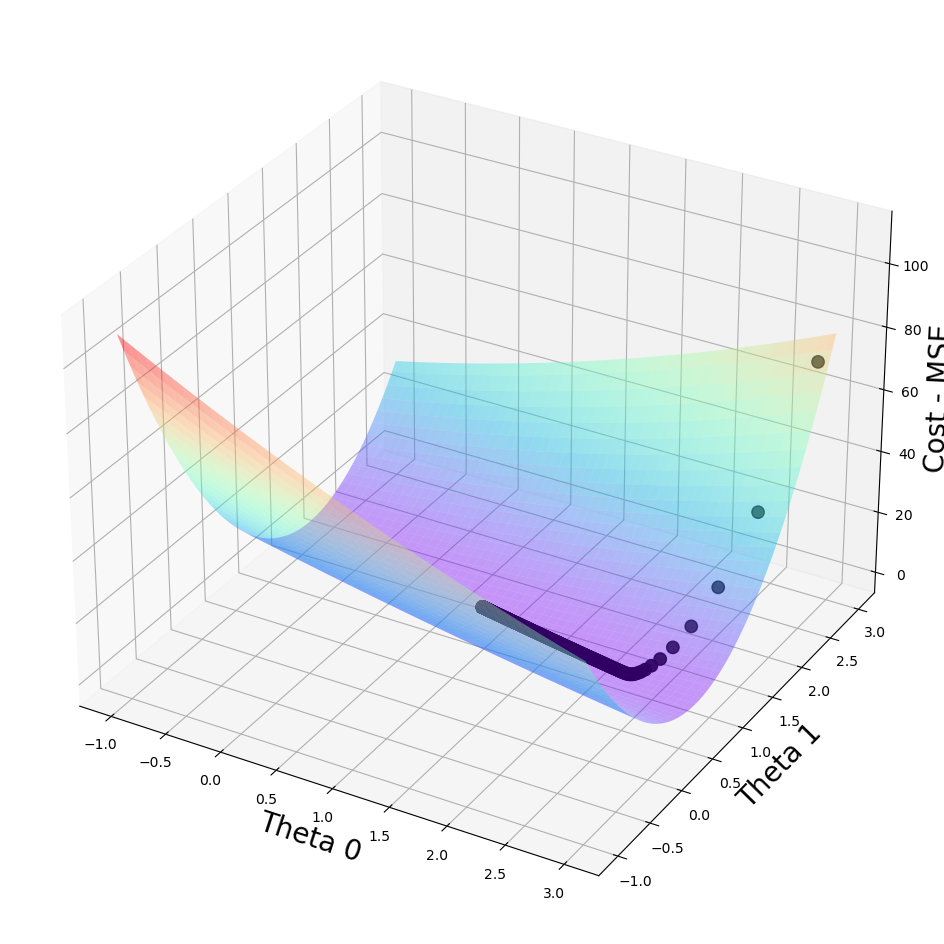

In [61]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, c="black")
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()